In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from utils import networks, util
import copy
from keras import backend as K 
'''
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
'''

Using TensorFlow backend.


2.2.4


'\nimport tensorflow as tf\nconfig = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\nsess = tf.Session(config=config)\n'

In [2]:
data_train = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')
# Read our image
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_tr28, X_val28, X_te28, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test)

In [3]:
batch_size = 256
epochs = 50
num_classes = 10

X_train_flat, X_val_flat, X_test_flat = util.flatten_data(X_tr28, X_val28, X_te28)

# MULTILAYER PERCEPTRON

In [4]:
model = networks.mlp()
history = model.fit(X_train_flat, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val_flat, y_val))
score = model.evaluate(X_test_flat, y_test, verbose=0)

util.save_everything(model,'mlp_50ep', history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.6529 

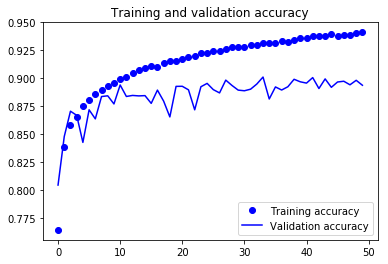

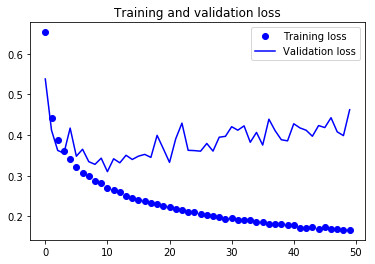

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test_flat)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]


from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.81      0.85      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.77      0.83      1000
     Class 3       0.89      0.93      0.91      1000
     Class 4       0.85      0.82      0.83      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.67      0.81      0.73      1000
     Class 7       0.95      0.93      0.94      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



/home/furkan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


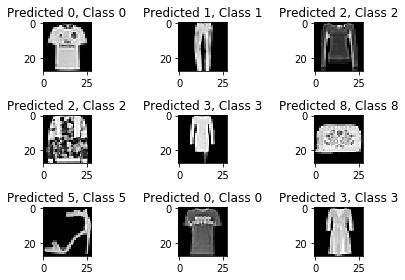

In [7]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

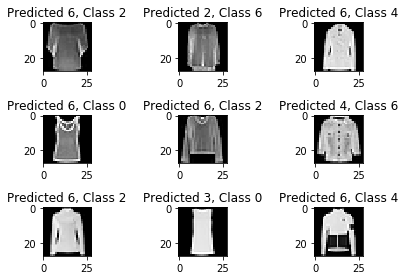

In [8]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

# Simple CNN

In [9]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'simple_cnn_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.5162 - acc: 0.8163 - val_loss: 0.3654 - val_acc: 0.8711
Epoch 2/50
48000/48000 [==============================] - 3s 64us/step - loss: 0.3036 - acc: 0.8905 - val_loss: 0.2942 - val_acc: 0.8932
Epoch 3/50
48000/48000 [==============================] - 3s 64us/step - loss: 0.2519 - acc: 0.9075 - val_loss: 0.2808 - val_acc: 0.8987
Epoch 4/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.2137 - acc: 0.9225 - val_loss: 0.2708 - val_acc: 0.9021
Epoch 5/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1831 - acc: 0.9323 - val_loss: 0.2469 - val_acc: 0.9103
Epoch 6/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1568 - acc: 0.9423 - val_loss: 0.2617 - val_acc: 0.9118
Epoch 7/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1314 - acc: 0.9511 - val_loss: 0.2611 - val_acc

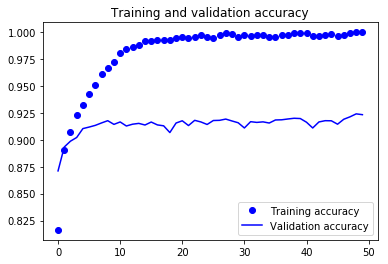

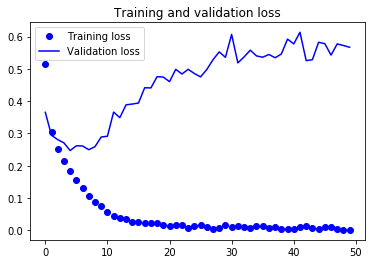

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.86      0.87      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.90      0.87      0.88      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.88      0.90      0.89      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.78      0.78      0.78      1000
     Class 7       0.97      0.94      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Simple CNN Dropout

In [12]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_dropout(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'simple_cnn_dropout_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.5254 - acc: 0.8112 - val_loss: 0.3521 - val_acc: 0.8725
Epoch 2/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.3168 - acc: 0.8854 - val_loss: 0.2948 - val_acc: 0.8926
Epoch 3/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.2624 - acc: 0.9041 - val_loss: 0.2692 - val_acc: 0.9003
Epoch 4/50
48000/48000 [==============================] - 3s 64us/step - loss: 0.2251 - acc: 0.9171 - val_loss: 0.2570 - val_acc: 0.9056
Epoch 5/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1976 - acc: 0.9271 - val_loss: 0.2542 - val_acc: 0.9055
Epoch 6/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1737 - acc: 0.9355 - val_loss: 0.2476 - val_acc: 0.9085
Epoch 7/50
48000/48000 [==============================] - 3s 65us/step - loss: 0.1503 - acc: 0.9441 - val_loss: 0.2536 - val_acc

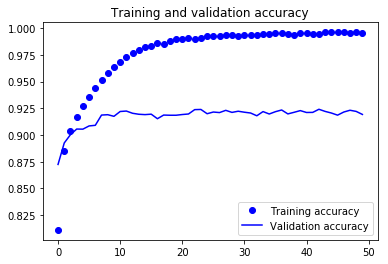

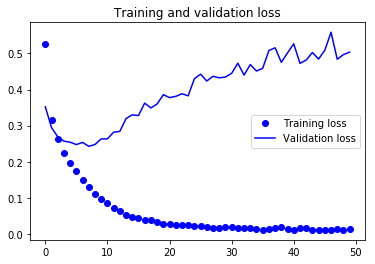

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.88      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.87      0.89      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.88      0.91      0.89      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.81      0.79      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Simple CNN BatchNorm

In [37]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'simple_cnn_bn_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.5228 - acc: 0.8163 - val_loss: 0.3395 - val_acc: 0.8741
Epoch 2/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.3094 - acc: 0.8896 - val_loss: 0.2953 - val_acc: 0.8909
Epoch 3/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.2569 - acc: 0.9059 - val_loss: 0.2632 - val_acc: 0.9026
Epoch 4/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.2163 - acc: 0.9212 - val_loss: 0.2488 - val_acc: 0.9059
Epoch 5/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.1838 - acc: 0.9330 - val_loss: 0.2448 - val_acc: 0.9098
Epoch 6/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.1604 - acc: 0.9407 - val_loss: 0.2418 - val_acc: 0.9143
Epoch 7/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.1373 - acc: 0.9489 - val_loss: 0.2507 - val_acc

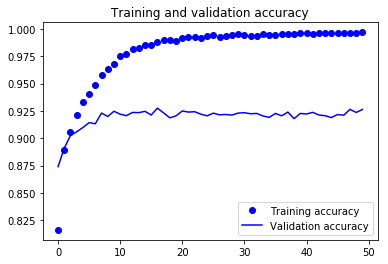

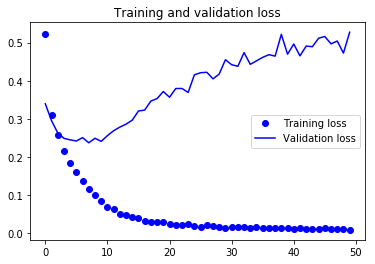

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.90      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.89      0.89      1000
     Class 3       0.93      0.94      0.93      1000
     Class 4       0.90      0.89      0.89      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.78      0.79      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.96      0.97      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Simple CNN BatchNorm Dropout

In [ ]:
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.simple_cnn_batchnorm_Dropout(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'simple_cnn_bn_do_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 152us/step - loss: 0.5087 - acc: 0.8223 - val_loss: 0.3345 - val_acc: 0.8807
Epoch 2/50
48000/48000 [==============================] - 5s 96us/step - loss: 0.2970 - acc: 0.8931 - val_loss: 0.2935 - val_acc: 0.8945
Epoch 3/50
48000/48000 [==============================] - 5s 101us/step - loss: 0.2454 - acc: 0.9110 - val_loss: 0.2620 - val_acc: 0.9042
Epoch 4/50
48000/48000 [==============================] - 4s 93us/step - loss: 0.2057 - acc: 0.9246 - val_loss: 0.2429 - val_acc: 0.9116
Epoch 5/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.1767 - acc: 0.9347 - val_loss: 0.2385 - val_acc: 0.9150
Epoch 6/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.1522 - acc: 0.9432 - val_loss: 0.2689 - val_acc: 0.9096
Epoch 7/50
48000/48000 [==============================] - 4s 92us/step - loss: 0.1342 - acc: 0.9495 - val_loss: 0.2400 - val_a

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

# AlexNet

In [15]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.alexnet_model(img_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=4,
          epochs=20,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'alexnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1051s 22ms/step - loss: 1.0677 - acc: 0.6674 - val_loss: 0.5767 - val_acc: 0.8417
Epoch 2/20
48000/48000 [==============================] - 1048s 22ms/step - loss: 0.7589 - acc: 0.7680 - val_loss: 0.4426 - val_acc: 0.8813
Epoch 3/20
48000/48000 [==============================] - 1060s 22ms/step - loss: 0.6518 - acc: 0.8076 - val_loss: 0.4052 - val_acc: 0.8845
Epoch 4/20
48000/48000 [==============================] - 1042s 22ms/step - loss: 0.5825 - acc: 0.8304 - val_loss: 0.4682 - val_acc: 0.8719
Epoch 5/20
48000/48000 [==============================] - 1045s 22ms/step - loss: 0.5359 - acc: 0.8454 - val_loss: 0.3864 - val_acc: 0.8959
Epoch 6/20
48000/48000 [==============================] - 1426s 30ms/step - loss: 0.5029 - acc: 0.8536 - val_loss: 0.4437 - val_acc: 0.8816
Epoch 7/20
48000/48000 [==============================] - 1353s 28ms/step - loss: 0.4748 - acc: 0.8617 - val_l

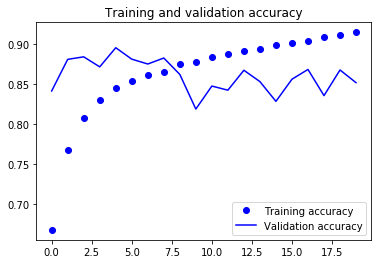

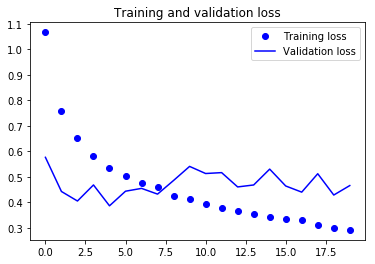

              precision    recall  f1-score   support

     Class 0       0.86      0.79      0.82      1000
     Class 1       0.96      0.74      0.83      1000
     Class 2       0.91      0.79      0.84      1000
     Class 3       0.70      0.94      0.80      1000
     Class 4       0.88      0.79      0.83      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.68      0.83      0.75      1000
     Class 7       0.81      0.89      0.85      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.90      0.80      0.85      1000

   micro avg       0.85      0.85      0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

# mobilenetV2

In [17]:
K.clear_session()
del model

x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.mobilenetV2(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'mobilenetv2_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 466us/step - loss: 0.6777 - acc: 0.7494 - val_loss: 1.6538 - val_acc: 0.6760
Epoch 2/50
48000/48000 [==============================] - 14s 294us/step - loss: 0.3703 - acc: 0.8658 - val_loss: 1.7755 - val_acc: 0.7303
Epoch 3/50
48000/48000 [==============================] - 14s 294us/step - loss: 0.2995 - acc: 0.8912 - val_loss: 1.5482 - val_acc: 0.7673
Epoch 4/50
48000/48000 [==============================] - 14s 294us/step - loss: 0.2584 - acc: 0.9041 - val_loss: 1.1299 - val_acc: 0.8139
Epoch 5/50
48000/48000 [==============================] - 14s 295us/step - loss: 0.2305 - acc: 0.9137 - val_loss: 1.4982 - val_acc: 0.8003
Epoch 6/50
48000/48000 [==============================] - 14s 294us/step - loss: 0.2097 - acc: 0.9235 - val_loss: 1.3361 - val_acc: 0.7810
Epoch 7/50
48000/48000 [==============================] - 14s 295us/step - loss: 0.1908 - acc: 0.9303 - val_loss: 1.

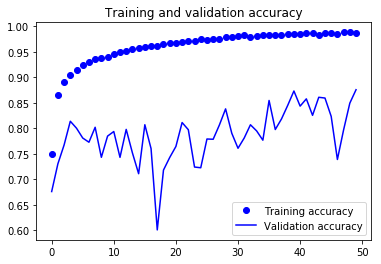

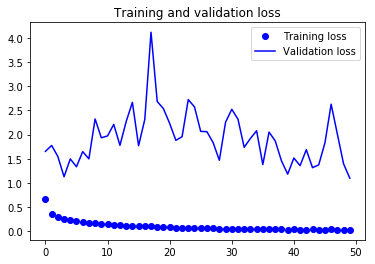

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.75      0.81      1000
     Class 1       0.96      0.99      0.97      1000
     Class 2       0.84      0.90      0.86      1000
     Class 3       0.89      0.89      0.89      1000
     Class 4       0.79      0.91      0.84      1000
     Class 5       0.90      0.98      0.94      1000
     Class 6       0.79      0.59      0.68      1000
     Class 7       0.98      0.84      0.90      1000
     Class 8       0.87      0.99      0.92      1000
     Class 9       0.93      0.97      0.95      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




# nasnet

In [20]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.nasnet(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'nasnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.5920 - acc: 0.7850 - val_loss: 0.9626 - val_acc: 0.7358
Epoch 2/50
48000/48000 [==============================] - 38s 786us/step - loss: 0.3466 - acc: 0.8733 - val_loss: 1.6791 - val_acc: 0.6390
Epoch 3/50
48000/48000 [==============================] - 38s 787us/step - loss: 0.2804 - acc: 0.8966 - val_loss: 1.6944 - val_acc: 0.6739
Epoch 4/50
48000/48000 [==============================] - 38s 785us/step - loss: 0.2439 - acc: 0.9086 - val_loss: 1.0489 - val_acc: 0.7668
Epoch 5/50
48000/48000 [==============================] - 38s 786us/step - loss: 0.2204 - acc: 0.9172 - val_loss: 1.2458 - val_acc: 0.7314
Epoch 6/50
48000/48000 [==============================] - 38s 785us/step - loss: 0.2007 - acc: 0.9257 - val_loss: 2.2428 - val_acc: 0.6015
Epoch 7/50
48000/48000 [==============================] - 38s 787us/step - loss: 0.1782 - acc: 0.9347 - val_loss: 2.61

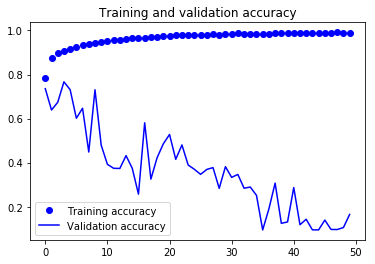

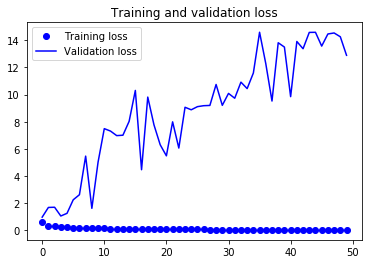

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.55      0.39      0.46      1000
     Class 1       0.11      1.00      0.20      1000
     Class 2       0.64      0.02      0.04      1000
     Class 3       0.95      0.02      0.04      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       1.00      0.27      0.42      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.18      0.00      0.01      1000

   micro avg       0.17      0.17      0.17     10000
   macro avg       0.34      0.17      0.12     10000
weighted avg       0.34      0.17      0.12     10000



/home/furkan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Inception

In [24]:
K.clear_session()
del model


# InceptionV3 needs at least 75,75 input
_, _, _, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test,75,75)
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)
model = networks.inceptionV3(input_shape=(75,75,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'inception_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 44s 918us/step - loss: 0.6226 - acc: 0.7741 - val_loss: 0.4834 - val_acc: 0.8260
Epoch 2/50
48000/48000 [==============================] - 27s 553us/step - loss: 0.3475 - acc: 0.8730 - val_loss: 0.4618 - val_acc: 0.8421
Epoch 3/50
48000/48000 [==============================] - 27s 554us/step - loss: 0.2802 - acc: 0.8995 - val_loss: 0.3123 - val_acc: 0.8937
Epoch 4/50
48000/48000 [==============================] - 27s 554us/step - loss: 0.2443 - acc: 0.9109 - val_loss: 0.2977 - val_acc: 0.8952
Epoch 5/50
48000/48000 [==============================] - 27s 555us/step - loss: 0.2136 - acc: 0.9211 - val_loss: 5.4073 - val_acc: 0.5785
Epoch 6/50
48000/48000 [==============================] - 27s 555us/step - loss: 0.2054 - acc: 0.9252 - val_loss: 0.2876 - val_acc: 0.8976
Epoch 7/50
48000/48000 [==============================] - 27s 556us/step - loss: 0.1765 - acc: 0.9350 - val_loss: 0.

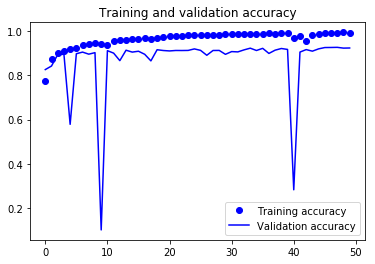

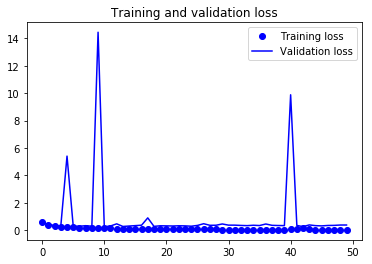

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.89      0.87      1000
     Class 1       1.00      0.99      0.99      1000
     Class 2       0.88      0.91      0.89      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.91      0.90      0.90      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.85      0.73      0.79      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.92      1.00      0.96      1000
     Class 9       0.99      0.96      0.97      1000

   micro avg       0.93      0.93      0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# VGG

In [33]:
K.clear_session()
#del model
_, _, _, X_tr_res, X_val_res, X_te_res, y_train, y_val = util.prepare_data(X,y,X_test,56,56)

x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.vgg16(input_shape=(56,56,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'vgg_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 35s 737us/step - loss: 2.3037 - acc: 0.0984 - val_loss: 2.3028 - val_acc: 0.0946
Epoch 2/50
48000/48000 [==============================] - 31s 647us/step - loss: 2.3026 - acc: 0.1001 - val_loss: 2.3026 - val_acc: 0.1007
Epoch 3/50
48000/48000 [==============================] - 30s 635us/step - loss: 2.3026 - acc: 0.1013 - val_loss: 2.3027 - val_acc: 0.0946
Epoch 4/50
48000/48000 [==============================] - 31s 644us/step - loss: 2.3026 - acc: 0.1014 - val_loss: 2.3028 - val_acc: 0.0946
Epoch 5/50
44032/48000 [==========================>...] - ETA: 2s - loss: 2.3026 - acc: 0.1000

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

# Resnet

In [30]:
K.clear_session()
del model
x_t = copy.deepcopy(X_tr_res)
y_t = copy.deepcopy(y_train)
x_v = copy.deepcopy(X_val_res)
y_v = copy.deepcopy(y_val)

model = networks.resnet50(input_shape=(75,75,1))
history = model.fit(x_t, y_t,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_v, y_v))
score = model.evaluate(X_te_res, y_test, verbose=0)

util.save_everything(model,'resnet_50ep', history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 65s 1ms/step - loss: 0.5482 - acc: 0.8098 - val_loss: 0.5010 - val_acc: 0.8317
Epoch 2/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2781 - acc: 0.8987 - val_loss: 0.2996 - val_acc: 0.8928
Epoch 3/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2160 - acc: 0.9207 - val_loss: 0.2771 - val_acc: 0.9020
Epoch 4/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1847 - acc: 0.9319 - val_loss: 0.3149 - val_acc: 0.8943
Epoch 5/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1586 - acc: 0.9429 - val_loss: 0.3196 - val_acc: 0.8956
Epoch 6/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1338 - acc: 0.9505 - val_loss: 0.2983 - val_acc: 0.9044
Epoch 7/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1162 - acc: 0.9570 - val_loss: 0.3253 - val_acc

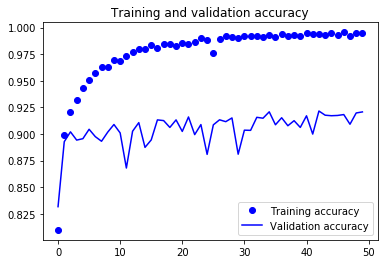

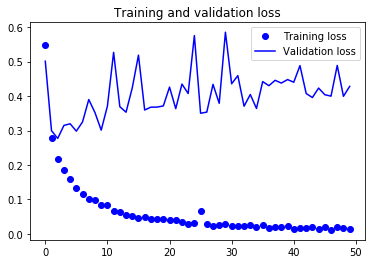

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_r = range(len(accuracy))
plt.plot(epochs_r, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs_r, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs_r, loss, 'bo', label='Training loss')
plt.plot(epochs_r, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
#get the predictions for the test data
predicted_classes = model.predict(X_te_res)
predicted_classes = np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.91      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.92      0.89      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.93      0.84      0.88      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.83      0.72      0.77      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.97      0.99      0.98      1000
     Class 9       0.96      0.98      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

